<a href="https://colab.research.google.com/github/mtakakobi/Purwadhika/blob/main/Capstone_Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Daegu Apartment**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recomendation

### **Business Problem Understanding**

**Context**

Apartemen adalah salah satu pilihan kebutuhan tempat tinggal di masyarakat moderen saat ini, yang diakibatkan dari keterbatasan tanah dan padatnya aktivitas bisnis di daerah urban. Oleh karena itu sangatlah menarik untuk melihat harga apartement dipengaruhi oleh berbagi faktor internal dan eksternal.


Individu atau perusahaan biasanya memberikan penawaran unit(apartemen). Penawar dapat menjual unit melalui platform dengan menentukan harga apartement. Cara ini membuat para pemilik apartement kesulitan untuk menentukan harga pasar. Jika harga terlalu tinggi mau akan sulit untuk melakukan penjualan, sebaliknya jika terlalu rendah pemilik kan sulit untuk mendapatkan keuntungan maksimal.

**Problem Statement**

Salah satu tantangan bagi para pemilik unit adalah untuk menentukan harga untuk unit mereka. Dengan melihat kepada berbagai faktor pendukung unit yang dimiliki oleh unit maka pemilk harus dapat menentukan harga yang tepat untuk dapat tetap kompetitif di lingkungan sekitar dan mendapatkan keuntungan maksimal.

**Goals** 

Melihat persoalan yang ditemukan, pemilik unit tentu perlu memiliki cara untuk dapat memprediksi harga terbaik untuk unitnya. Dilihat dari perbedaan fitur atau faktor pendukung apartment.

Bagi pemilik unit, tool atau cara perdiksi ini dapat memberikan prediksi harga yang adil, sehingga pemilik tidak perlu ragu dalam menentukan harga unit.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pemilik unit untuk dapat menyediakan 'tool' prediksi harga unit , yang mana akan berguna untuk pemilik dalam menentukan harga unit.

**Metric Evaluation**

1. **RMSE** : nilai rataan akar kuadrat dari error
2. **MAE** : rataan nilai ansolut error
3. **MAPE** : rataan presentasi error yang dihasilkan oleh model 

semakin kecil nilai dari tiap metriks maka model kita semakin akurat.

### **Data Understanding**



*   Dataset merupakan data listing Apartement di Daegu
*   Setiap baris data merepresentasikan informasi terkait unit apartment



**Attributes Information**

| **Atribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Hallway Type | Object | Tipe apartemen |
|TimeToSubway | Object | Waktu yang dibutuhkan ke subway station terdekat |
| SubwayStation | Object | Nama subway station terdekat |
| N_FacilitiesNearBy(ETC) | Float64 | Jumlah fasilitas disekitar |
| N_FacilitiesNearBy(PublicOffice) | Float64 | Jumlah fasilitas kantor publik disekitar |
| N_SchoolNearBy(University) | Float64 | Jumlah Universitas disekitar | 
| N_Parkinglot(Basement) | Float64 | Jumlah lahan parkir | 
| YearBuilt | Int64 | Tahun apartemen dibangun | 
| N_FacilitiesInApt | Int64 | Jumlah fasilitas di apartemen | 
| Size(sqf) | Int64 | Ukuran Fasilitas (dalam meter persegi) | 
| SalePrice | Int64 | Harga unit apartemen (Won) |

In [2]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copy of data_daegu_apartment.csv')

In [4]:
df.head(
    10
)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
5,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,118584
6,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1334,326548
7,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,143362
8,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,910,172566
9,corridor,5min~10min,Banwoldang,0.0,3.0,2.0,108.0,2014,2,288,99823


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [6]:
df.shape

(4123, 11)

In [7]:
df_model = df.copy()

In [8]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[corridor, mixed]"
1,TimeToSubway,object,0,0.0,5,"[15min~20min, 10min~15min]"
2,SubwayStation,object,0,0.0,8,"[no_subway_nearby, Sin-nam]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[1.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[1.0, 5.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[0.0, 1.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[181.0, 218.0]"
7,YearBuilt,int64,0,0.0,16,"[1985, 2015]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[5, 1]"
9,Size(sqf),int64,0,0.0,89,"[1394, 1743]"


Dari info dataset diatas, tidak terdapat data kosong pada kolom dataset.

In [9]:
df_model.duplicated().sum()

1422

Data memiliki 1422 baris duplikat.

In [10]:
df_model = df_model.drop_duplicates(keep = 'last')

Melakukan drop atau menghilangkan baris duplikat dan hanya menyimpan kemunculan terakhirnya.

In [11]:
df_model.duplicated().sum()

0

Data sudah tidak memilki baris duplikat

In [12]:
df_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Data tidak memiliki nilai NA.

In [13]:
time_to_subway = list(df_model['TimeToSubway'].unique())
time_to_subway

def transform_time_to_subway(tts):
  tts_ordinal = []
  for i in tts:
    if i == time_to_subway[3]:
      tts_ordinal.append(0)
    elif i == time_to_subway[1]: 
      tts_ordinal.append(1)
    elif i == time_to_subway[2]:
      tts_ordinal.append(2)
    elif i == time_to_subway[0]:
      tts_ordinal.append(3)
    elif i == time_to_subway[4]:
      tts_ordinal.append(4)
    else:
      None
  
  return tts_ordinal

df_model['TimeToSubway'] = transform_time_to_subway(df_model['TimeToSubway'])

Merubah nilai nilai TimeToSubway kedalam ukuran 0 sampai 4, berdasarkan nilai awal.

In [14]:
df_model.head(5)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2,mixed,3,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
4,terraced,1,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
5,mixed,3,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,118584
7,mixed,2,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,143362
8,terraced,0,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,910,172566


Melihat kembali dataset setelah hasil konversi TimeToSubway

In [15]:
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.940022,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,1.185137,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,1.000000,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,2.000000,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,3.000000,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,4.000000,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


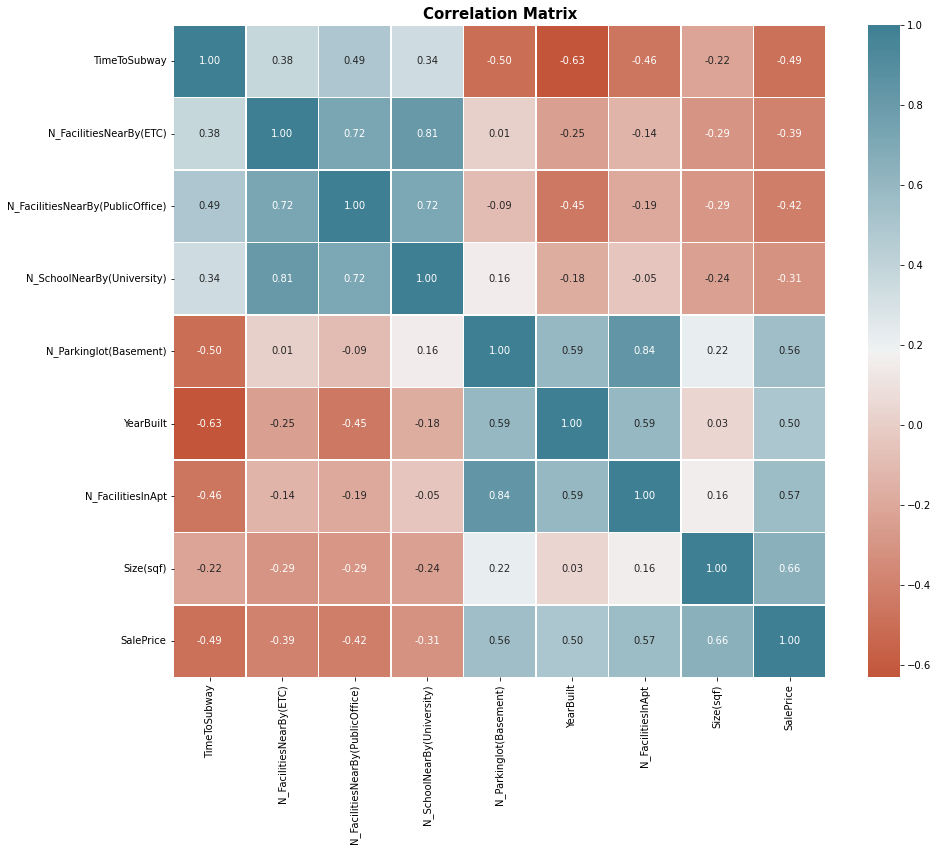

In [16]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

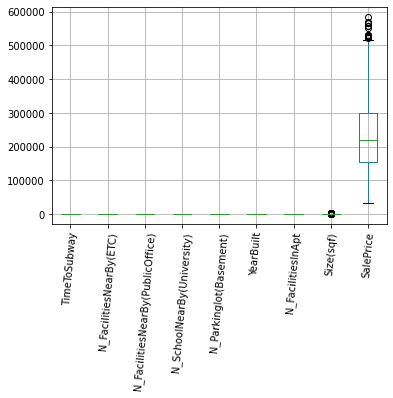

In [17]:
df_model.boxplot(rot=85);

In [18]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [19]:
find_anomalies(df_model['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5


In [20]:
find_anomalies(df_model['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [21]:
print(f"Outlier pada kolom SalePrice : {df_model[df_model['SalePrice'] > 521901.5].count()['SalePrice']}")
print(f"Outlier pada kolom Size(sqf) : {df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)']}")

Outlier pada kolom SalePrice : 17
Outlier pada kolom Size(sqf) : 84


In [22]:
df_model = df_model[(df_model['Size(sqf)'] <= 1803.0)]
df_model = df_model[(df_model['SalePrice'] <= 521901.5)]

Menghapus baris dengan nilai outlier pada kolom SalePrice dan Size(sqf)

### **Clean Dataset**

In [23]:
df_model

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2,mixed,3,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
4,terraced,1,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
5,mixed,3,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,118584
7,mixed,2,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,143362
8,terraced,0,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,910,172566
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,1,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,3,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,3,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,2,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [24]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611 entries, 2 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2611 non-null   object 
 1   TimeToSubway                      2611 non-null   int64  
 2   SubwayStation                     2611 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2611 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2611 non-null   float64
 5   N_SchoolNearBy(University)        2611 non-null   float64
 6   N_Parkinglot(Basement)            2611 non-null   float64
 7   YearBuilt                         2611 non-null   int64  
 8   N_FacilitiesInApt                 2611 non-null   int64  
 9   Size(sqf)                         2611 non-null   int64  
 10  SalePrice                         2611 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 244.8+ KB


In [25]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [26]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType','SubwayStation'])
], remainder='passthrough')

**Data Splitting**

In [27]:
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

**Train and Test Splitting**

In [28]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=123)

**Memilih model Benchmark**

In [29]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=123)
rf = RandomForestRegressor(random_state=123)
xgb = XGBRegressor(random_state=123)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=123)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54563.97249243 -52858.21854027 -53476.01360646 -53609.37729815
 -55932.065542  ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-44636.89647884 -41882.77045979 -43225.06283392 -43184.3590877
 -43542.57376492] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22549847 -0.19992077 -0.22123575 -0.21953917 -0.21497607] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-47793.83497049 -46101.78903574 -47874.65065036 -49804.63925425
 -48816.32381006] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37849.40748845 -35469.29562941 -37726.78875376 -38971.77024706
 -37725.74762578] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [30]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-54087.929496,1071.736627,-43294.332525,880.170619,-0.216234,0.008826
1,KNN Regressor,-48078.247544,1229.139158,-37548.601949,1140.397990,-0.191167,0.008319
2,DecisionTree Regressor,-45824.443455,396.301512,-36189.147106,692.633278,-0.184942,0.005215
3,RandomForest Regressor,-45802.128780,478.044712,-36208.410330,642.888971,-0.185449,0.004812
4,XGBoost Regressor,-45388.404138,961.831385,-36050.964365,905.312750,-0.184709,0.005394


In [31]:
# Benchmark 3 model terbaik
models = {
    'XGB': XGBRegressor(random_state=123),
    'DecisionTree': DecisionTreeRegressor(random_state=123),
    'RandomForest': RandomForestRegressor(random_state=123)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

[02:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,RMSE,MAE,MAPE
XGB,45088.512878,36608.931551,0.190747
DecisionTree,45280.198014,36560.855996,0.188270
RandomForest,45266.383899,36561.423294,0.189010


**Hyperparameter Tuning**

Berdasarkan rekapan hasil metriks evaluasi diatas, dipilih Random Forest yang memiliki hasil terbaik.

In [40]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 20000, num = 10)]
max_features = ['sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(10, 210, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
verbose = [1,2,3]
bootstrap = [True, False]
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__verbose' : verbose,
               'rf__bootstrap': bootstrap}

model = RandomForestRegressor(random_state = 123)

estimator = Pipeline(steps= [
    ('prepocessing',transformer),
    ('scale',scaler),
    ('rf',model)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=123)

tuning_model = RandomizedSearchCV(estimator,
                        param_distributions = random_grid,
                        n_iter = 50,
                        cv = crossval,
                        scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
                        n_jobs = -1,
                        refit = 'neg_root_mean_squared_error',
                        random_state = 123)

tuning_model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 2400
building tree 2 of 2400
building tree 3 of 2400
building tree 4 of 2400
building tree 5 of 2400
building tree 6 of 2400
building tree 7 of 2400
building tree 8 of 2400
building tree 9 of 2400
building tree 10 of 2400
building tree 11 of 2400
building tree 12 of 2400
building tree 13 of 2400
building tree 14 of 2400
building tree 15 of 2400
building tree 16 of 2400
building tree 17 of 2400
building tree 18 of 2400
building tree 19 of 2400
building tree 20 of 2400
building tree 21 of 2400
building tree 22 of 2400
building tree 23 of 2400
building tree 24 of 2400
building tree 25 of 2400
building tree 26 of 2400
building tree 27 of 2400
building tree 28 of 2400
building tree 29 of 2400
building tree 30 of 2400
building tree 31 of 2400
building tree 32 of 2400
building tree 33 of 2400
building tree 34 of 2400
building tree 35 of 2400
building tree 36 of 2400
building tree 37 of 2400
building tree 38 of 2400
building tree 39 of 2400
building tree 40 of 2400
building 

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:    4.3s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=Pipeline(steps=[('prepocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'SubwayStation'])])),
                                             ('scale', StandardScaler()),
                                             ('rf',
                                              RandomForestRegressor(random_state=123))]),
                   n_iter=50, n_jobs=-1,
                   param_dist...
         

Melakukan Hypertuning parameter untuk metode Random Forest dan menyimpan parameter yang memberikan hasil RMSE terendah.

In [41]:
tuned_rf = tuning_model.best_estimator_
tuning_model.best_params_

{'rf__verbose': 3,
 'rf__n_estimators': 2400,
 'rf__min_samples_split': 10,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'log2',
 'rf__max_depth': 187,
 'rf__bootstrap': False}

Memasukan model RandomForest dengan estimator terbaik kedalam tuned_rf. Dan menambilkan parameter yang memberikan hasil paling baik.

In [42]:
model = {'RandomForest' : RandomForestRegressor()}
tuned_rf.fit(X_train,y_train)
y_pred_rf_tuned = tuned_rf.predict(X_test)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mape_rf_tuned = mean_absolute_percentage_error(y_test, y_pred_rf_tuned)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuned, 'MAE': mae_rf_tuned, 'MAPE': mape_rf_tuned},index=model.keys())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 2400
building tree 2 of 2400
building tree 3 of 2400
building tree 4 of 2400
building tree 5 of 2400
building tree 6 of 2400
building tree 7 of 2400
building tree 8 of 2400
building tree 9 of 2400
building tree 10 of 2400
building tree 11 of 2400
building tree 12 of 2400
building tree 13 of 2400
building tree 14 of 2400
building tree 15 of 2400
building tree 16 of 2400
building tree 17 of 2400
building tree 18 of 2400
building tree 19 of 2400
building tree 20 of 2400
building tree 21 of 2400
building tree 22 of 2400
building tree 23 of 2400
building tree 24 of 2400
building tree 25 of 2400
building tree 26 of 2400
building tree 27 of 2400
building tree 28 of 2400
building tree 29 of 2400
building tree 30 of 2400
building tree 31 of 2400
building tree 32 of 2400
building tree 33 of 2400
building tree 34 of 2400
building tree 35 of 2400
building tree 36 of 2400
building tree 37 of 2400
building tree 38 of 2400
building tree 39 of 2400
building tree 40 of 2400
building 

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:    0.4s finished


In [43]:
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,45283.15824,36595.885387,0.188509


In [44]:
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,45266.383899,36561.423294,0.18901


Hasil setelah Tuning tidak berbeda jauh dengan base modelnya, ada kenaikan sedikit pada RMSE dan MAE, ada juga penurunan sedikit MAPE

| Model | Sebelum | Sesudah | 
| --- | --- | ---|
| RMSE | 45266.4 | 45283.2 |
| MAE | 36561.4 | 36595.9 |
| MAPE | 0.18901 | 0.188509 |


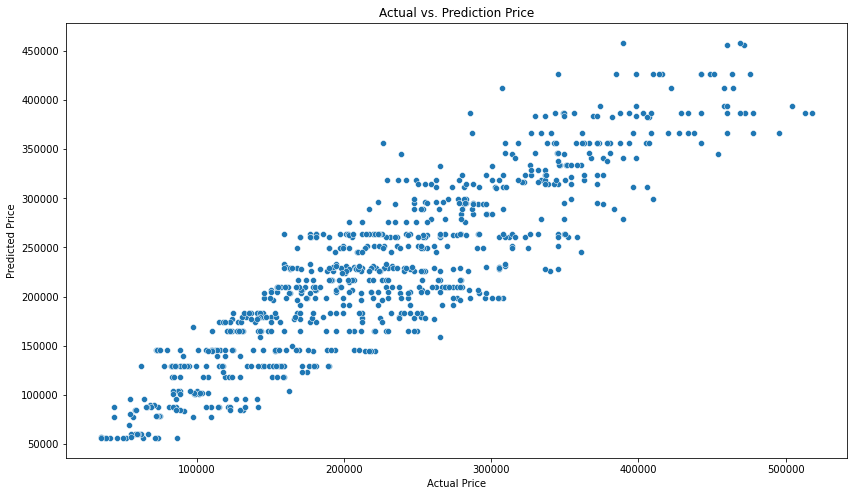

In [45]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuned).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

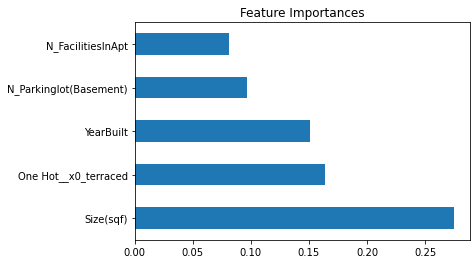

In [49]:
# Plot feature importances
feature_imp = pd.Series(tuned_rf['rf'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan permodelan yang sudah dilakukan, fitur Size(sqf) dan juga HallwayType merupakan fitur yang paling berpengaruh dalam menuntukan harga unit.

Metriks Evaluasi yang digunakan adalah RMSE, MAE, dan MAPE. Dilihat dari nilai Mape setelah tuning yang sebesar ~18%, dapat disimpulkan bahwa kita dapat memperkirakan harga unit apartement di Daegu dengan rentang nilai seperti yang dilatih terhadap model, dengan harga maksimal 521.901 Won, maka perkiraan kesalahan hasil prediksi merupakan kurang lebih 18% dari harga seharusnya.

Tetapi, tidak menutup kemungkinan harga akan meleset jauh dari prekiraan, karena adanya bias yang masih cukup tinggi diantara harga aktual dan prediksi.
Untuk mengatasi bisa dapat menambahkan jumlah fitur yang dapat lebih dalam menjelaskan unit.

### *Recommendations** 

 * Melakukan A/B Testing untuk menguji tingkat efektivitas model terhadapat lakunya unit jika dibandingkan dengan host sendiri yang menentukan harganya.

Hal-hal yang dapat dilakukan untuk mengembangkan model yang lebih baik

 1. Menambah jumlah fitur yang lebih korelatif dengan fiur
 2. Dapat mencoba dengan model yang lebih kompleks